In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas
import random
import seaborn as sns
sns.set_theme()

from matplotlib import pyplot as plt

import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/fake-reviews-detection/source/common/')

In [5]:
import data_preprocessing
import ngram
import linguistic_feature

In [6]:
root_dir = "/content/drive/My Drive/Colab Notebooks/fake-reviews-detection"
df = data_preprocessing.import_raw_data(root_dir)
display(df[:5])

,Label,Rating,Ori_Review
0,1,1,"For 250 dollars, cheapest room available at th..."
1,1,1,Me and my business associate had a job in Chic...
2,1,1,My stay at the Hyatt Regency was an experience...
3,1,1,"Upon first inspection, Sofitel Chicago Water T..."
4,1,1,I wish to express my dissatisfaction with my s...


In [7]:
df = data_preprocessing.preprocess_ngram(df)
df = data_preprocessing.preprocess_linguistic_features(df)
df = linguistic_feature.linguistic_features(df)
df.head()

,Label,Rating,Ori_Review,Clean_Review,PP_Review,Word_List,Word_List_all,num_word,num_coreword,num_stopword,num_char,char_per_word,num_first_sing,num_first_pru,num_third
0,1,1,"For 250 dollars, cheapest room available at th...",for dollar cheap room available at the hard ro...,dollar cheap available hard rock assume access...,"[dollar, cheap, available, hard, rock, assume,...","[for, 250, dollar, cheap, room, available, at,...",68,24,44,357,5.250000,4,0,1
1,1,1,Me and my business associate had a job in Chic...,me and my business associate have a job in chi...,business associate job want somewhere feature ...,"[business, associate, job, want, somewhere, fe...","[me, and, my, business, associate, have, a, jo...",104,41,63,544,5.230769,2,8,0
2,1,1,My stay at the Hyatt Regency was an experience...,my stay at the hyatt regency be an experience ...,hyatt regency experience never ever forget goo...,"[hyatt, regency, experience, never, ever, forg...","[my, stay, at, the, hyatt, regency, be, an, ex...",264,116,148,1265,4.791667,22,0,5
3,1,1,"Upon first inspection, Sofitel Chicago Water T...",upon first inspection sofitel chicago water to...,upon first inspection sofitel water tower look...,"[upon, first, inspection, sofitel, water, towe...","[upon, first, inspection, sofitel, chicago, wa...",135,65,70,738,5.466667,1,0,1
4,1,1,I wish to express my dissatisfaction with my s...,i wish to express my dissatisfaction with my s...,wish express dissatisfaction sofitel water tow...,"[wish, express, dissatisfaction, sofitel, wate...","[i, wish, to, express, my, dissatisfaction, wi...",227,87,140,1222,5.383260,16,10,4


## Sample Reviews

#### Deceptive

In [8]:
for txt in df[df['Label'] == 1]['Ori_Review'].sample(3):
    print(txt)
    print()

I stayed this hotel for 2 nights. I had high hopes seeing as this is a 4 star hotel and seems quite elegant based on pictures I've seen. Upon entering the building, you can easily see that it is clean and high class. The lobby was nice, and everything seemed as it should be. However, as soon as I made it into my room, it was completely different than everything previous to it. It was dirty, visible yellow stains on the walls and all around the restroom. The room too was not completely organized as all other hotel rooms I've been to. There was also a lingering smell from the last tenants. When I called the front desk about these issues, they sent someone up to fix it. I left the hotel about two hours and upon returning, they were still at it! This is an unreasonable amount of time to fix these glaring errors. The smell also did not completely disappear when they were done. As I was too tired, I just decided to deal with it for the rest of my stay here and focus on enjoying my vacation a

#### Truthful

In [9]:
for txt in df[df['Label'] == -1]['Ori_Review'].sample(3):
    print(txt)
    print()

We have been for the first time in Chicago and stayed in the Swissotel for five nights,a wonderful place.Room was on the 29th floor,absolutely clean and nice and a breathtaking lakeview.Breakfast perfect and service really good.People were always helpful.It's a little bit far from Magnificent mile and the loop,but in front of the hotel there are buses (number6)waiting there next turn,not a real bus stop,but drivers are frindly and you can get on the bus.Next time going to Chicago we will again stay in the Swissotel.

We stayed at the Swissotel for a special birthday weekend for my wife from Aug 25 to 29. I had called ahead to ask for a nice room and to order flowers for my wife. Jaymes Ballard, the Concierge, made arrange for flowers, early check-in and we had a great room. Our room was the 33rd floor with a view facing the city. Room was large, everything looked like new, great bed, large bathroom with separate shower, great ammenities. A beautiful bouquet of flowers arrived upon our 

## Explore Data Distribution

#### Review length distribution (by charactors and words)

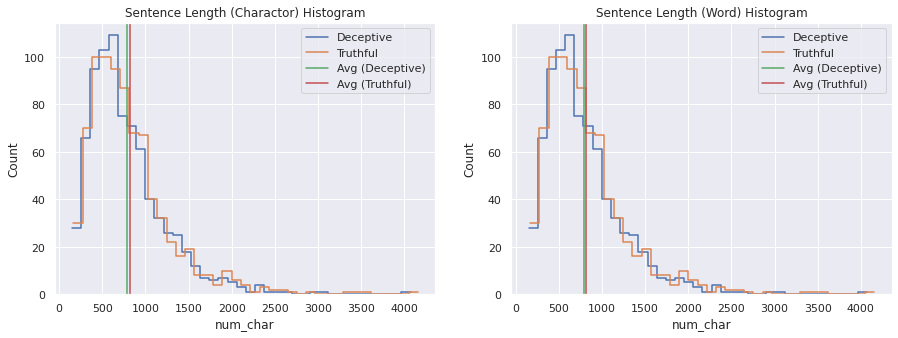

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(15)

num_char_dec = df[df['Label'] == 1]['num_char']
num_char_tru = df[df['Label'] == -1]['num_char']
num_word_dec = df[df['Label'] == 1]['num_char']
num_word_tru = df[df['Label'] == -1]['num_char']

sns.histplot(num_char_dec, ax=ax1, element="step", fill=False, label='Deceptive')
sns.histplot(num_char_tru, ax=ax1, element="step", fill=False, label='Truthful')
ax1.axvline(x=num_char_dec.mean(), label='Avg (Deceptive)', c='g')
ax1.axvline(x=num_char_tru.mean(), label='Avg (Truthful)', c='r')
ax1.set_title('Sentence Length (Charactor) Histogram')
ax1.legend()

sns.histplot(num_word_dec, ax=ax2, element="step", fill=False, label='Deceptive')
sns.histplot(num_word_tru, ax=ax2, element="step", fill=False, label='Truthful')
ax2.axvline(x=num_word_dec.mean(), label='Avg (Deceptive)', c='g')
ax2.axvline(x=num_word_tru.mean(), label='Avg (Truthful)', c='r')
ax2.set_title('Sentence Length (Word) Histogram')
ax2.legend()

plt.show()

#### Core word and stop word distribution

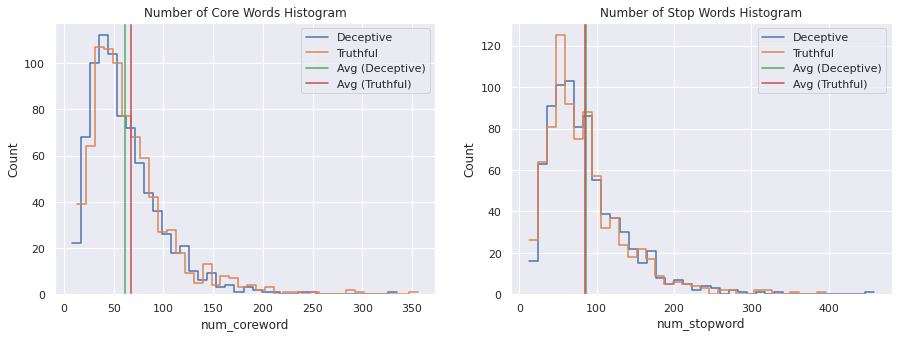

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(15)

num_core_dec = df[df['Label'] == 1]['num_coreword']
num_core_tru = df[df['Label'] == -1]['num_coreword']
num_stop_dec = df[df['Label'] == 1]['num_stopword']
num_stop_tru = df[df['Label'] == -1]['num_stopword']

sns.histplot(num_core_dec, ax=ax1, element="step", fill=False, label='Deceptive')
sns.histplot(num_core_tru, ax=ax1, element="step", fill=False, label='Truthful')
ax1.axvline(x=num_core_dec.mean(), label='Avg (Deceptive)', c='g')
ax1.axvline(x=num_core_tru.mean(), label='Avg (Truthful)', c='r')
ax1.set_title('Number of Core Words Histogram')
ax1.legend()

sns.histplot(num_stop_dec, ax=ax2, element="step", fill=False, label='Deceptive')
sns.histplot(num_stop_tru, ax=ax2, element="step", fill=False, label='Truthful')
ax2.axvline(x=num_stop_dec.mean(), label='Avg (Deceptive)', c='g')
ax2.axvline(x=num_stop_tru.mean(), label='Avg (Truthful)', c='r')
ax2.set_title('Number of Stop Words Histogram')
ax2.legend()

plt.show()

#### Pronoun Distribution

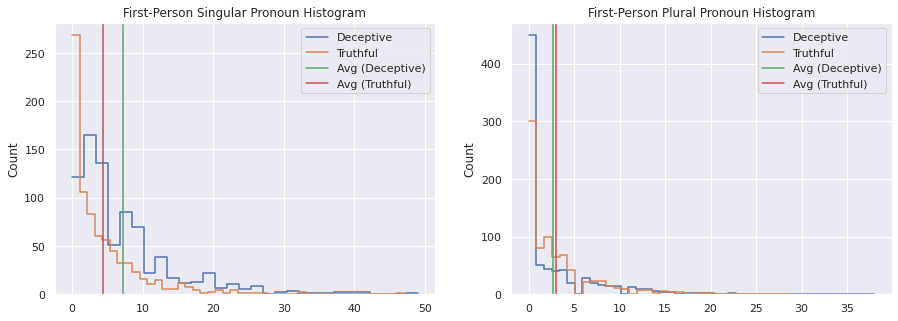

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(15)

num_fs_dec = df[df['Label'] == 1]['num_first_sing']
num_fs_tru = df[df['Label'] == -1]['num_first_sing']
num_fp_dec = df[df['Label'] == 1]['num_first_pru']
num_fp_tru = df[df['Label'] == -1]['num_first_pru']
num_third_dec = df[df['Label'] == 1]['num_third']
num_third_tru = df[df['Label'] == -1]['num_third']

sns.histplot(num_fs_dec, ax=ax1, element="step", fill=False, label='Deceptive')
sns.histplot(num_fs_tru, ax=ax1, element="step", fill=False, label='Truthful')
ax1.axvline(x=num_fs_dec.mean(), label='Avg (Deceptive)', c='g')
ax1.axvline(x=num_fs_tru.mean(), label='Avg (Truthful)', c='r')
ax1.set_title('First-Person Singular Pronoun Histogram')
ax1.set(xlabel='')
ax1.legend()

sns.histplot(num_fp_dec, ax=ax2, element="step", fill=False, label='Deceptive')
sns.histplot(num_fp_tru, ax=ax2, element="step", fill=False, label='Truthful')
ax2.axvline(x=num_fp_dec.mean(), label='Avg (Deceptive)', c='g')
ax2.axvline(x=num_fp_tru.mean(), label='Avg (Truthful)', c='r')
ax2.set_title('First-Person Plural Pronoun Histogram')
ax2.set(xlabel='')
ax2.legend()

plt.savefig('first_person_pronoun.png')
plt.show()